In [ ]:
#Check distribution of lengths for proteomes for S. cerevisiae and for Rhodotorulaspora mucilaginosa as defined by Stefan's genemark protocol.  

#Stefan already did some filtering, but there seem to be a lot of small proteins predicted.  I am planning to filter the smaller proteins. 



In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

from Bio import SeqIO

project_base_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/projects/9_strains') + os.sep
uniprot_base_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/external_data/genomes/diverse_strains/proteomes') + os.sep
scer_base_dir = os.path.normpath('C:/Users/heineib/Google Drive/Crick_LMS/external_data/genomes/scer_ref') + os.sep

In [13]:
#Import Proteome for 
#S.cer 
#S.cer uniprot
#S.cer genemark
#Rm
#Ks
#Ks post filter




proteome_names = { 'Scer_all' : scer_base_dir + 'orf_trans_all_R64-3-1_20210421.fasta',  # Cerevisiae including dubious orfs
  'Scer': scer_base_dir + 'orf_trans_R64-3-1_20210421.fasta',
  'Scer_genemark' : project_base_dir + os.path.normpath('OWN/20211009_from_stefan/Sc_genemark_genes.fa.cured.fa_code_0.prot.fa_curedlong.prot.fa'), 
  'Scer_uniprot'  : uniprot_base_dir + 'Scer_uniprot-proteome_UP000002311.fasta',
  'Rmuc_genemark' : project_base_dir + os.path.normpath('NCBI/Rm/Rhodotorula_mu.fa'), 
  'Ks' : project_base_dir + os.path.normpath('OWN/20211009_from_stefan/Ks_genemark_genes.fa.cured.fa_code_0.prot.fa'), 
  'Ks_post_filter' : project_base_dir + os.path.normpath('OWN/20211009_from_stefan/Ks_genemark_genes.fa.cured.fa_code_0.prot.fa_curedlong.prot.fa')
}


lengths_dict = {}
for proteome_name, fname in proteome_names.items():
    seqs = SeqIO.parse(fname, 'fasta')
    lengths = []
    for seq in seqs: 
        lengths.append(len(seq))
    lengths_dict[proteome_name] = lengths
    

In [26]:
for proteome_name, lengths in lengths_dict.items(): 
    print('{} has {} identified proteins, mean length {:3.0f} residues, min length = {:3.0f}'.format(proteome_name, len(lengths), np.mean(lengths), np.min(lengths)))

Scer_all has 6716 identified proteins, mean length 451 residues, min length =  17
Scer has 6034 identified proteins, mean length 488 residues, min length =  17
Scer_genemark has 5299 identified proteins, mean length 494 residues, min length =  10
Scer_uniprot has 6050 identified proteins, mean length 485 residues, min length =  16
Rmuc_genemark has 30512 identified proteins, mean length  83 residues, min length =  10
Ks has 5673 identified proteins, mean length 485 residues, min length =   1
Ks_post_filter has 5235 identified proteins, mean length 493 residues, min length =  10


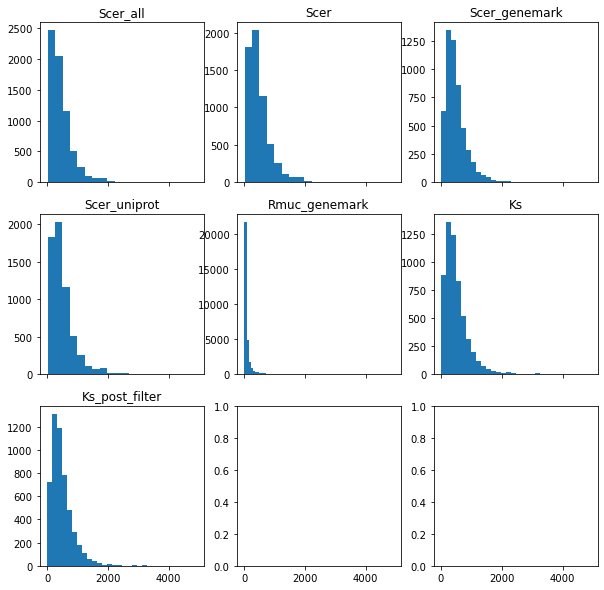

In [19]:
fig, axarr = plt.subplots(3,3, figsize=(10,10), sharex = True)

axarr_flat = axarr.flatten()

for jj, (proteome_name, lengths) in enumerate(lengths_dict.items()): 
    ax = axarr_flat[jj]
    
    ax.hist(lengths, bins = 20)
    ax.set_title(proteome_name)


In [29]:
a.sort()


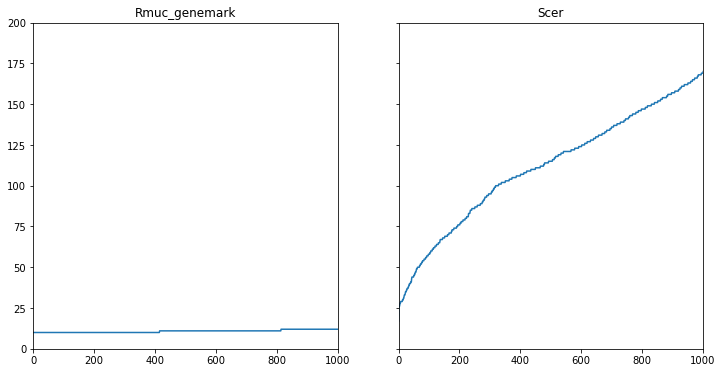

In [40]:
fig, axarr = plt.subplots(1,2, figsize = (12,6), sharey = True)

for jj, proteome in enumerate(['Rmuc_genemark', 'Scer']):
    lengths = lengths_dict[proteome]
    lengths_copy = lengths.copy()
    lengths_copy.sort()
      
    ax = axarr[jj]

    ax.plot(lengths_copy)
    ax.set_title(proteome)
    ax.set_xlim([0,1000])
    ax.set_ylim([0,200])
    


In [52]:
#Rmuc translation from transcriptome

rmuc_xcripts_fname = uniprot_base_dir + 'GSE141796_Trinity.fasta'
rmuc_proteome_fname = uniprot_base_dir + 'GSE141796_Trinity_translated.fasta'

rmuc_xcripts = SeqIO.parse(rmuc_xcripts_fname, 'fasta')

with open(rmuc_proteome_fname, 'w') as f:

    for xcript in rmuc_xcripts: 
        f.write('>' + xcript.id + '\n')
        cds = xcript.seq.translate()
        f.write(str(cds))
    

In [50]:
.name


AttributeError: 'Seq' object has no attribute 'name'